In [1]:
# Install yfinance.
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Import dependencies.
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import ParameterGrid
from sklearn import metrics
from datetime import datetime


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
# Setting the start date
today = datetime.now()
start_date = datetime(today.year-1 ,today.month ,today.day)
print(start_date)

2022-01-28 00:00:00


In [4]:
# Tickers for the companies used for data analysis
ticker_dist = {"Google": "GOOGL",
              "Microsoft":"MSFT",
              "Tesla":"TSLA",
              "Amazon":"AMZN",
              "Netflix":"NFLX",
              "Apple":"AAPL",
              "Facebook":"META"}


In [5]:
# Converting the data to csv.
for ticker in ticker_dist:
    filepath = ticker +".csv"
    globals()[ticker] = yf.download(ticker_dist[ticker], start=start_date, end=today)
    globals()[ticker].to_csv(filepath)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [6]:
# Reading the data from csv.
for ticker in ticker_dist:
    filepath = ticker +".csv"
    globals()[ticker] = pd.read_csv(filepath, index_col=0)
    ticker = globals()[ticker]
    

In [7]:
# all ticker name list for labels graph comparision.
labels=[]
for ticker in ticker_dist:
    labels.append(ticker)


In [8]:
# Displaying the labels.
labels

['Google', 'Microsoft', 'Tesla', 'Amazon', 'Netflix', 'Apple', 'Facebook']

In [9]:
# The ticker list for 7 companies.
ticker_list = ["GOOGL","MSFT","TSLA","META","AAPL","AMZN","NFLX"]

In [10]:
# Loading the data by grouping it by 'ticker'.
df = yf.download(ticker_list, start=start_date, end=today,group_by="ticker") 

[*********************100%***********************]  7 of 7 completed


In [11]:
# Converting the data to csv file.
filepath= "merged_df.csv"
df.to_csv(filepath)

In [12]:
# Display the dataframe.
df.head()

MSFT                                      \
                                 Open        High         Low       Close   
Date                                                                        
2022-01-28 00:00:00-05:00  300.230011  308.480011  294.450012  308.260010   
2022-01-31 00:00:00-05:00  308.950012  312.380005  306.369995  310.980011   
2022-02-01 00:00:00-05:00  310.410004  310.630005  305.130005  308.760010   
2022-02-02 00:00:00-05:00  309.630005  315.119995  308.880005  313.459991   
2022-02-03 00:00:00-05:00  309.489990  311.230011  299.959991  301.250000   

                                                       AAPL              \
                            Adj Close    Volume        Open        High   
Date                                                                      
2022-01-28 00:00:00-05:00  305.398407  49743700  165.710007  170.350006   
2022-01-31 00:00:00-05:00  308.093140  46444500  170.160004  175.000000   
2022-02-01 00:00:00-05:00  305.893738  40950400  174.009995  174.839996   
2022-02-02 00:00:00-05:00  310.550110  36636000  174.750000  175.880005   
2022-02-03 00:00:00-05:00  298.453430  43730000  174.479996  176.240005   

                                                   ...        AMZN  \
                                  Low       Close  ...         Low   
Date                                               ...               
2022-01-28 00:00:00-05:00  162.800003  170.330002  ...  137.929504   
2022-01-31 00:00:00-05:00  169.509995  174.779999  ...  144.300507   
2022-02-01 00:00:00-05:00  172.309998  174.610001  ...  147.627502   
2022-02-02 00:00:00-05:00  173.330002  175.839996  ...  148.863495   
2022-02-03 00:00:00-05:00  172.119995  172.899994  ...  138.332993   

                                                                    NFLX  \
                                Close   Adj Close     Volume        Open   
Date                                                                       
2022-01-28 00:00:00-05:00  143.977997  143.977997   74392000  386.760010   
2022-01-31 00:00:00-05:00  149.573502  149.573502   78308000  401.970001   
2022-02-01 00:00:00-05:00  151.193497  151.193497   59220000  432.959991   
2022-02-02 00:00:00-05:00  150.612503  150.612503   87330000  448.250000   
2022-02-03 00:00:00-05:00  138.845505  138.845505  225532000  421.440002   

                                                                           \
                                 High         Low       Close   Adj Close   
Date                                                                        
2022-01-28 00:00:00-05:00  387.000000  372.079987  384.359985  384.359985   
2022-01-31 00:00:00-05:00  427.700012  398.200012  427.140015  427.140015   
2022-02-01 00:00:00-05:00  458.480011  425.540009  457.130005  457.130005   
2022-02-02 00:00:00-05:00  451.980011  426.480011  429.480011  429.480011   
2022-02-03 00:00:00-05:00  429.260010  404.279999  405.600006  405.600006   

                                     
                             Volume  
Date                                 
2022-01-28 00:00:00-05:00  11966600  
2022-01-31 00:00:00-05:00  20047500  
2022-02-01 00:00:00-05:00  22568100  
2022-02-02 00:00:00-05:00  14346000  
2022-02-03 00:00:00-05:00   9905200  

[5 rows x 42 columns]

In [13]:
# Displaying information for merged_df
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-01-28 00:00:00-05:00 to 2023-01-27 00:00:00-05:00
Data columns (total 42 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   (MSFT, Open)        251 non-null    float64
 1   (MSFT, High)        251 non-null    float64
 2   (MSFT, Low)         251 non-null    float64
 3   (MSFT, Close)       251 non-null    float64
 4   (MSFT, Adj Close)   251 non-null    float64
 5   (MSFT, Volume)      251 non-null    int64  
 6   (AAPL, Open)        251 non-null    float64
 7   (AAPL, High)        251 non-null    float64
 8   (AAPL, Low)         251 non-null    float64
 9   (AAPL, Close)       251 non-null    float64
 10  (AAPL, Adj Close)   251 non-null    float64
 11  (AAPL, Volume)      251 non-null    int64  
 12  (META, Open)        251 non-null    float64
 13  (META, High)        251 non-null    float64
 14  (META, Low)         251 non-null    float64
 15  (META, C

In [48]:
# Loading the data from csv files.
google_df = pd.read_csv("Google.csv")
Amazon_df = pd.read_csv("Amazon.csv")
Facebook_df = pd.read_csv("Facebook.csv")
Apple_df = pd.read_csv("Apple.csv")
Microsoft_df = pd.read_csv("Microsoft.csv")
Netflix_df = pd.read_csv("Netflix.csv")
Tesla_df = pd.read_csv("Tesla.csv")

In [49]:
# Checking the information for google_df
google_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   Open       251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Close      251 non-null    float64
 5   Adj Close  251 non-null    float64
 6   Volume     251 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [50]:
# Converting the date column to date type.
google_df['Date'] = pd.to_datetime(google_df['Date'], utc=True)


In [51]:
# Checking data types to confirm the change.
google_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   Date       251 non-null    datetime64[ns, UTC]
 1   Open       251 non-null    float64            
 2   High       251 non-null    float64            
 3   Low        251 non-null    float64            
 4   Close      251 non-null    float64            
 5   Adj Close  251 non-null    float64            
 6   Volume     251 non-null    int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1)
memory usage: 13.9 KB


In [52]:
google_df = google_df.set_index('Date')
google_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-28 05:00:00+00:00,129.658997,133.356506,128.485001,133.350998,133.350998,34362000
2022-01-31 05:00:00+00:00,134.162003,135.473007,132.209503,135.303497,135.303497,39986000
2022-02-01 05:00:00+00:00,137.594498,137.792999,134.368500,137.643997,137.643997,68644000
2022-02-02 05:00:00+00:00,151.250000,151.546494,145.522507,148.000000,148.000000,123200000
2022-02-03 05:00:00+00:00,145.705505,149.675003,142.665497,143.089996,143.089996,71518000


In [53]:
google_df['High_Low_per'] = (google_df['High'] - google_df['Close']) / google_df['Close']*100


In [54]:
google_df['Per_change'] = (google_df['Open'] - google_df['Open']) / google_df['Close']*100

In [55]:
google_df = google_df[['Adj Close','High_Low_per','Per_change','Volume']]

In [56]:
import math

In [57]:
forecast_ceil = int(math.ceil(0.001*len(google_df)))

In [58]:
label_col = 'Adj Close'

In [59]:
google_df['label'] = google_df[label_col].shift(-forecast_ceil)

In [60]:
from sklearn.svm import SVR 
from sklearn.linear_model import LinearRegression
import sklearn.preprocessing as preprocessing

import matplotlib.pyplot as plt
from matplotlib import style

In [61]:
#feaures X, labels Y
X = np.array(google_df.drop(['label'],1))
X = preprocessing.scale(X)
X = X[:-forecast_ceil:]
X_lately = X[-forecast_ceil:] #no y value

In [62]:
google_df.dropna(inplace=True)

In [63]:
y = np.array(google_df['label'])

In [64]:
len(X)

250

In [65]:
len(y)

250

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)


In [69]:
clf = SVR(kernel='rbf')

In [70]:
clf.fit(X_train, y_train) #train

SVR()

In [71]:
accuracy = clf.score(X_test, y_test) #test Accuracy squared error for linreg


In [72]:
 
print(accuracy) #directionally accurate

0.7229055452050495


In [73]:
forecast_set = clf.predict(X_lately) #pass a single value or array

In [74]:
print(forecast_set, accuracy) # stockprices next 30 days

[99.16034784] 0.7229055452050495


In [75]:
google_df['Forecast'] = np.nan

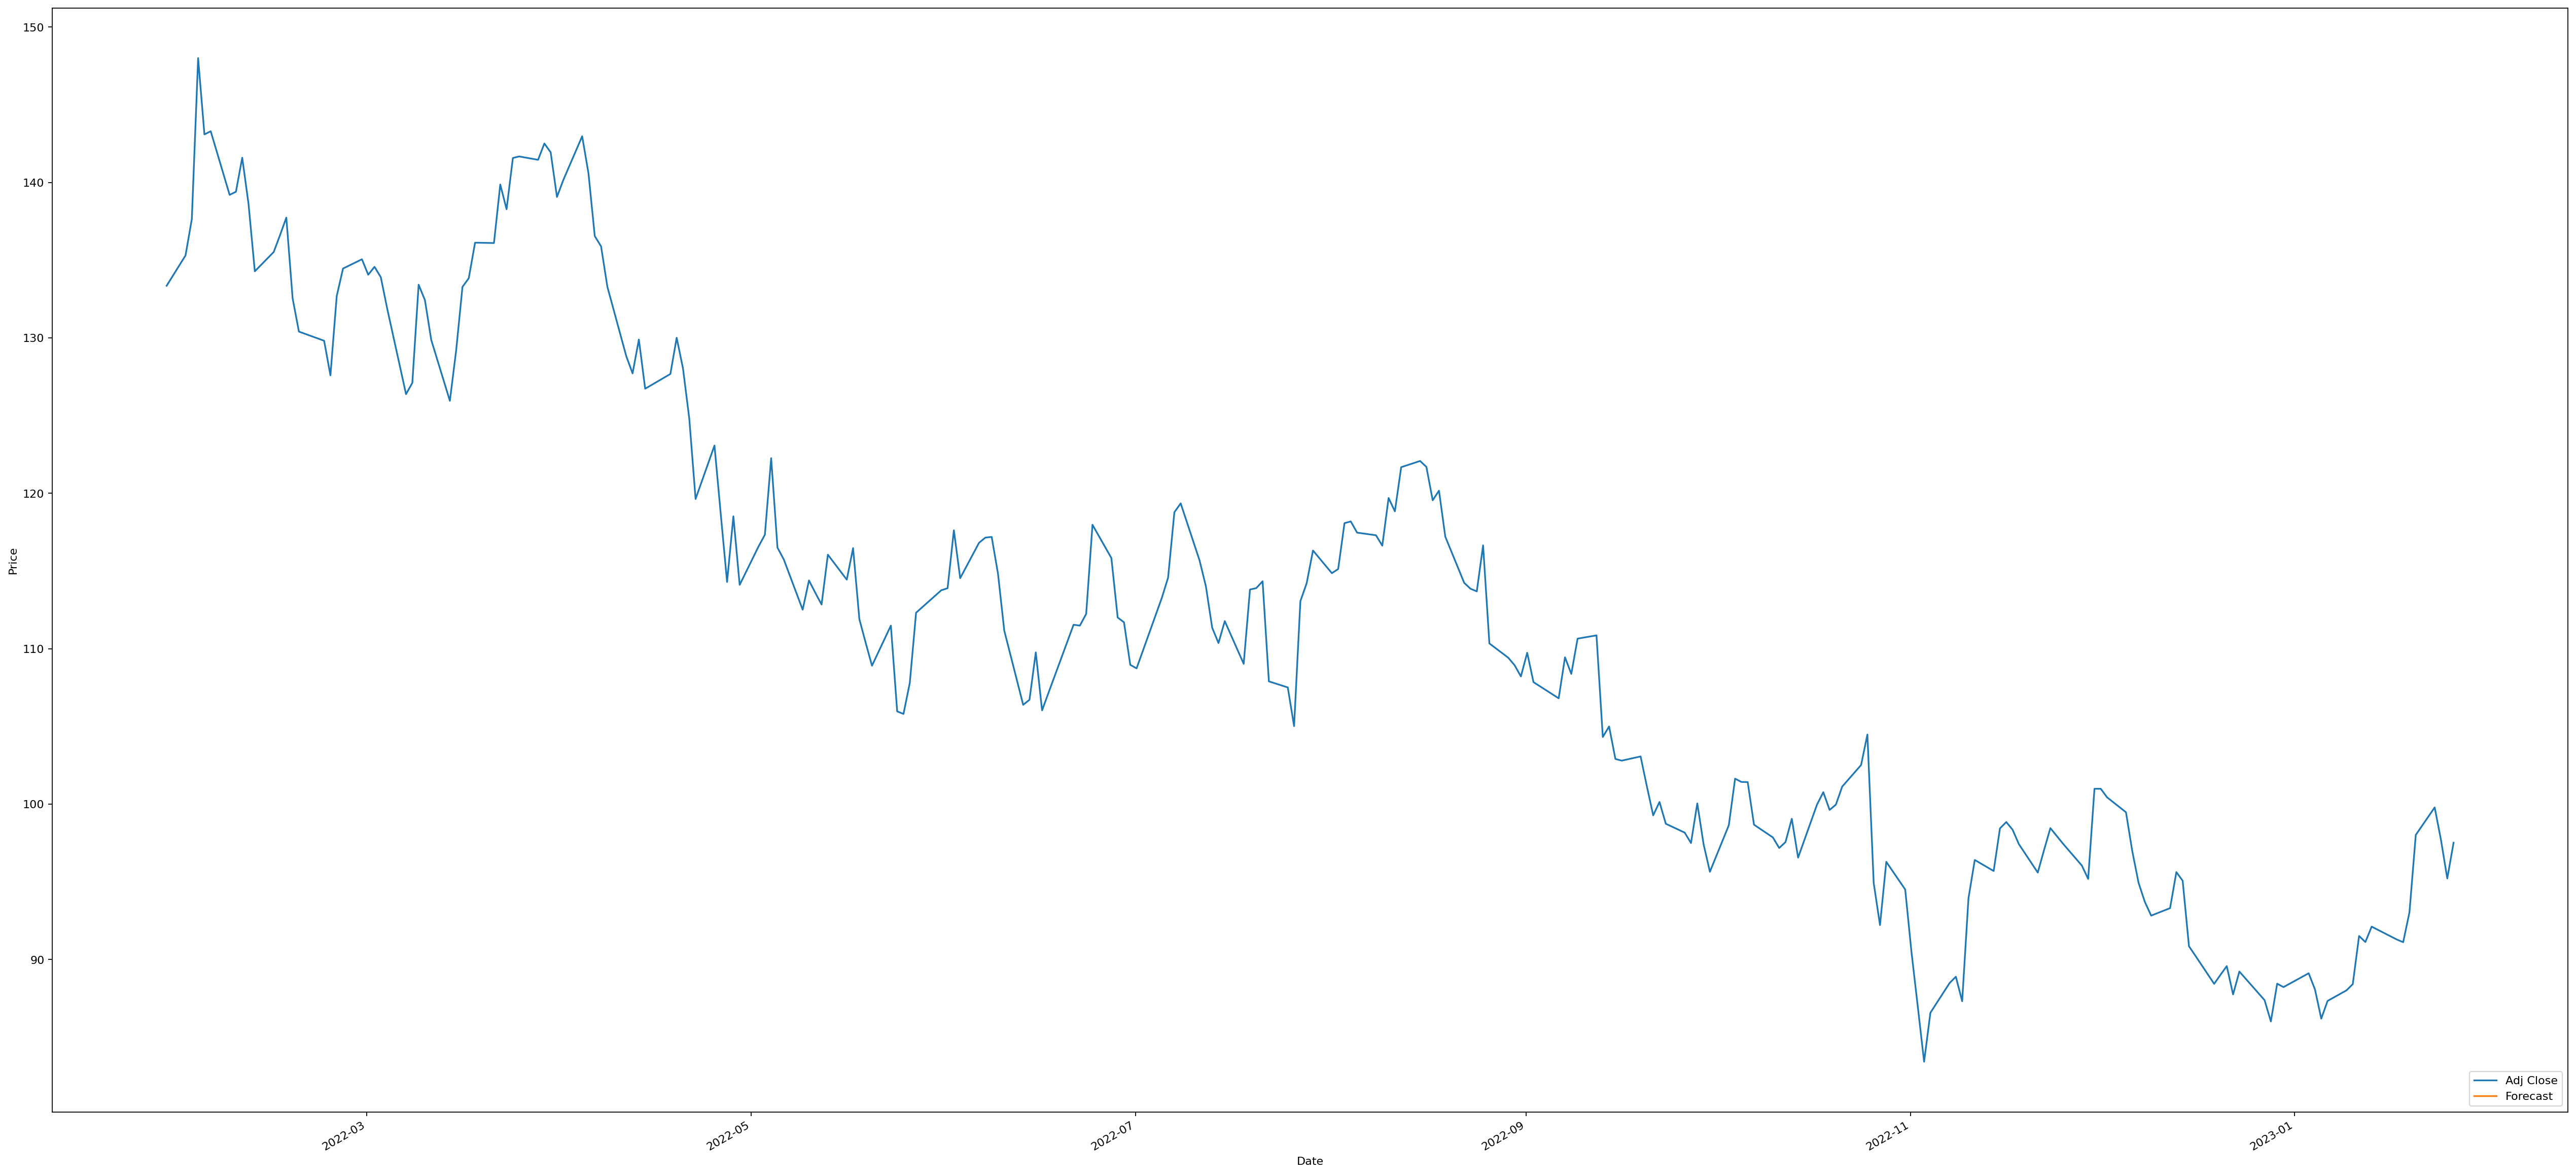

In [76]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(40, 20), dpi=160, facecolor='w', edgecolor='k')
google_df['Adj Close'].plot()
google_df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()